In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size = 64)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        
        logits = self.linear_relu_stack(x)
        
        return logits

model = NeuralNetwork()

loss_function = nn.CrossEntropyLoss()

In [2]:
def train_loop(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    
    model.train()

    sum_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        
        loss = loss_function(pred, y)
        
        sum_loss += loss.item()

        loss.backward()

        optimizer.step()
        
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [3]:
def test_loop(dataloader, model, loss_function):
    model.eval()
    
    size = len(dataloader.dataset)
    
    num_batches = len(dataloader)
    
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_function(pred, y).item()
            
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    
    correct /= size
    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return correct, test_loss

In [4]:
def run_training(epochs, train_dataloader, model, loss_function, optimizer):
    test_loss = []
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n--------------------------------")
        
        sum_loss = train_loop(train_dataloader, model, loss_function, optimizer)

        acc, avg_loss = test_loop(test_dataloader, model, loss_function)

        test_loss.append(avg_loss)
    
    print("Done!")
    
    return test_loss

In [5]:
batch_size = 64
epochs = 50
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [6]:
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.301601  [   64/60000]
loss: 2.287554  [ 6464/60000]
loss: 2.263723  [12864/60000]
loss: 2.257321  [19264/60000]
loss: 2.245239  [25664/60000]
loss: 2.213578  [32064/60000]
loss: 2.220956  [38464/60000]
loss: 2.185384  [44864/60000]
loss: 2.188553  [51264/60000]
loss: 2.163285  [57664/60000]
Test Error: 
 Accuracy: 52.7%, Avg loss: 2.148913 

Epoch 2
--------------------------------
loss: 2.158916  [   64/60000]
loss: 2.147098  [ 6464/60000]
loss: 2.083133  [12864/60000]
loss: 2.105662  [19264/60000]
loss: 2.057498  [25664/60000]
loss: 1.990821  [32064/60000]
loss: 2.029811  [38464/60000]
loss: 1.944445  [44864/60000]
loss: 1.962222  [51264/60000]
loss: 1.898580  [57664/60000]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.883171 

Epoch 3
--------------------------------
loss: 1.914063  [   64/60000]
loss: 1.886093  [ 6464/60000]
loss: 1.759723  [12864/60000]
loss: 1.812223  [19264/60000]
loss: 1.702060  [25664/60000]
loss: 1.648568  [32064/

In [7]:
model = NeuralNetwork()

optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)

test_loss_rms = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.308830  [   64/60000]
loss: 0.560767  [ 6464/60000]
loss: 0.465081  [12864/60000]
loss: 0.472242  [19264/60000]
loss: 0.457507  [25664/60000]
loss: 0.442772  [32064/60000]
loss: 0.412962  [38464/60000]
loss: 0.512557  [44864/60000]
loss: 0.538967  [51264/60000]
loss: 0.408764  [57664/60000]
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.461774 

Epoch 2
--------------------------------
loss: 0.270618  [   64/60000]
loss: 0.336519  [ 6464/60000]
loss: 0.285650  [12864/60000]
loss: 0.360272  [19264/60000]
loss: 0.353147  [25664/60000]
loss: 0.394082  [32064/60000]
loss: 0.269874  [38464/60000]
loss: 0.410353  [44864/60000]
loss: 0.409934  [51264/60000]
loss: 0.419739  [57664/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.457213 

Epoch 3
--------------------------------
loss: 0.252490  [   64/60000]
loss: 0.345184  [ 6464/60000]
loss: 0.225730  [12864/60000]
loss: 0.310434  [19264/60000]
loss: 0.315362  [25664/60000]
loss: 0.421855  [32064/

In [8]:
model = NeuralNetwork()

optimizer = torch.optim.Adadelta(model.parameters(), lr = learning_rate)

test_loss_adadelta = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.306895  [   64/60000]
loss: 2.289947  [ 6464/60000]
loss: 2.278088  [12864/60000]
loss: 2.265968  [19264/60000]
loss: 2.249588  [25664/60000]
loss: 2.234571  [32064/60000]
loss: 2.238051  [38464/60000]
loss: 2.217019  [44864/60000]
loss: 2.213417  [51264/60000]
loss: 2.179513  [57664/60000]
Test Error: 
 Accuracy: 41.8%, Avg loss: 2.182149 

Epoch 2
--------------------------------
loss: 2.196429  [   64/60000]
loss: 2.182643  [ 6464/60000]
loss: 2.144420  [12864/60000]
loss: 2.152820  [19264/60000]
loss: 2.121617  [25664/60000]
loss: 2.084985  [32064/60000]
loss: 2.109422  [38464/60000]
loss: 2.063381  [44864/60000]
loss: 2.065066  [51264/60000]
loss: 2.009221  [57664/60000]
Test Error: 
 Accuracy: 55.0%, Avg loss: 2.015187 

Epoch 3
--------------------------------
loss: 2.044249  [   64/60000]
loss: 2.021978  [ 6464/60000]
loss: 1.950533  [12864/60000]
loss: 1.976067  [19264/60000]
loss: 1.917273  [25664/60000]
loss: 1.875085  [32064/

In [9]:
model = NeuralNetwork()

optimizer = torch.optim.Adafactor(model.parameters(), lr = learning_rate)

test_loss_adafactor = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.311162  [   64/60000]
loss: 1.947261  [ 6464/60000]
loss: 1.358016  [12864/60000]
loss: 1.175510  [19264/60000]
loss: 0.862763  [25664/60000]
loss: 0.832439  [32064/60000]
loss: 0.822472  [38464/60000]
loss: 0.736837  [44864/60000]
loss: 0.713409  [51264/60000]
loss: 0.703200  [57664/60000]
Test Error: 
 Accuracy: 75.9%, Avg loss: 0.676299 

Epoch 2
--------------------------------
loss: 0.635955  [   64/60000]
loss: 0.726623  [ 6464/60000]
loss: 0.480949  [12864/60000]
loss: 0.725549  [19264/60000]
loss: 0.594072  [25664/60000]
loss: 0.572289  [32064/60000]
loss: 0.585478  [38464/60000]
loss: 0.642735  [44864/60000]
loss: 0.617919  [51264/60000]
loss: 0.566694  [57664/60000]
Test Error: 
 Accuracy: 80.3%, Avg loss: 0.558493 

Epoch 3
--------------------------------
loss: 0.488745  [   64/60000]
loss: 0.581038  [ 6464/60000]
loss: 0.390193  [12864/60000]
loss: 0.624056  [19264/60000]
loss: 0.520135  [25664/60000]
loss: 0.508587  [32064/

In [10]:
model = NeuralNetwork()

optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

test_loss_adagrad = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.300728  [   64/60000]
loss: 0.826698  [ 6464/60000]
loss: 0.523287  [12864/60000]
loss: 0.711814  [19264/60000]
loss: 0.547639  [25664/60000]
loss: 0.544474  [32064/60000]
loss: 0.551473  [38464/60000]
loss: 0.653893  [44864/60000]
loss: 0.610362  [51264/60000]
loss: 0.525290  [57664/60000]
Test Error: 
 Accuracy: 81.5%, Avg loss: 0.525712 

Epoch 2
--------------------------------
loss: 0.429061  [   64/60000]
loss: 0.530259  [ 6464/60000]
loss: 0.368544  [12864/60000]
loss: 0.565915  [19264/60000]
loss: 0.466563  [25664/60000]
loss: 0.478106  [32064/60000]
loss: 0.471656  [38464/60000]
loss: 0.649717  [44864/60000]
loss: 0.581424  [51264/60000]
loss: 0.466860  [57664/60000]
Test Error: 
 Accuracy: 83.1%, Avg loss: 0.485063 

Epoch 3
--------------------------------
loss: 0.360875  [   64/60000]
loss: 0.483738  [ 6464/60000]
loss: 0.330014  [12864/60000]
loss: 0.523514  [19264/60000]
loss: 0.426996  [25664/60000]
loss: 0.449291  [32064/

In [11]:
model = NeuralNetwork()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

test_loss_adam = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.305978  [   64/60000]
loss: 0.591109  [ 6464/60000]
loss: 0.417621  [12864/60000]
loss: 0.507225  [19264/60000]
loss: 0.461635  [25664/60000]
loss: 0.418793  [32064/60000]
loss: 0.372783  [38464/60000]
loss: 0.510776  [44864/60000]
loss: 0.457111  [51264/60000]
loss: 0.509721  [57664/60000]
Test Error: 
 Accuracy: 85.6%, Avg loss: 0.405094 

Epoch 2
--------------------------------
loss: 0.245735  [   64/60000]
loss: 0.355357  [ 6464/60000]
loss: 0.278793  [12864/60000]
loss: 0.390827  [19264/60000]
loss: 0.405434  [25664/60000]
loss: 0.391703  [32064/60000]
loss: 0.311068  [38464/60000]
loss: 0.448202  [44864/60000]
loss: 0.409114  [51264/60000]
loss: 0.477524  [57664/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.386950 

Epoch 3
--------------------------------
loss: 0.210198  [   64/60000]
loss: 0.339139  [ 6464/60000]
loss: 0.235072  [12864/60000]
loss: 0.345714  [19264/60000]
loss: 0.343198  [25664/60000]
loss: 0.338042  [32064/

In [12]:
model = NeuralNetwork()

optimizer = torch.optim.AdamW(model.parameters(), lr = learning_rate)

test_loss_adamW = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.299193  [   64/60000]
loss: 0.562566  [ 6464/60000]
loss: 0.388694  [12864/60000]
loss: 0.498605  [19264/60000]
loss: 0.438823  [25664/60000]
loss: 0.414805  [32064/60000]
loss: 0.387398  [38464/60000]
loss: 0.539136  [44864/60000]
loss: 0.488413  [51264/60000]
loss: 0.504454  [57664/60000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.428186 

Epoch 2
--------------------------------
loss: 0.275689  [   64/60000]
loss: 0.348768  [ 6464/60000]
loss: 0.303143  [12864/60000]
loss: 0.386540  [19264/60000]
loss: 0.433510  [25664/60000]
loss: 0.385804  [32064/60000]
loss: 0.323974  [38464/60000]
loss: 0.502094  [44864/60000]
loss: 0.421530  [51264/60000]
loss: 0.442523  [57664/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.413484 

Epoch 3
--------------------------------
loss: 0.249958  [   64/60000]
loss: 0.314759  [ 6464/60000]
loss: 0.237315  [12864/60000]
loss: 0.347338  [19264/60000]
loss: 0.435732  [25664/60000]
loss: 0.344010  [32064/

In [13]:
model = NeuralNetwork()

optimizer = torch.optim.Adamax(model.parameters(), lr = learning_rate)

test_loss_Adamax = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.324510  [   64/60000]
loss: 0.738961  [ 6464/60000]
loss: 0.424186  [12864/60000]
loss: 0.609946  [19264/60000]
loss: 0.529504  [25664/60000]
loss: 0.466725  [32064/60000]
loss: 0.456249  [38464/60000]
loss: 0.602647  [44864/60000]
loss: 0.544549  [51264/60000]
loss: 0.510065  [57664/60000]
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.452553 

Epoch 2
--------------------------------
loss: 0.304840  [   64/60000]
loss: 0.404554  [ 6464/60000]
loss: 0.316603  [12864/60000]
loss: 0.461506  [19264/60000]
loss: 0.407057  [25664/60000]
loss: 0.392481  [32064/60000]
loss: 0.364838  [38464/60000]
loss: 0.517896  [44864/60000]
loss: 0.476029  [51264/60000]
loss: 0.490455  [57664/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.400093 

Epoch 3
--------------------------------
loss: 0.256745  [   64/60000]
loss: 0.336807  [ 6464/60000]
loss: 0.265915  [12864/60000]
loss: 0.368438  [19264/60000]
loss: 0.355342  [25664/60000]
loss: 0.361333  [32064/

In [14]:
model = NeuralNetwork()

optimizer = torch.optim.ASGD(model.parameters(), lr = learning_rate)

test_loss_ASGD = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.319554  [   64/60000]
loss: 2.301417  [ 6464/60000]
loss: 2.276988  [12864/60000]
loss: 2.259701  [19264/60000]
loss: 2.246282  [25664/60000]
loss: 2.218289  [32064/60000]
loss: 2.223713  [38464/60000]
loss: 2.194270  [44864/60000]
loss: 2.186493  [51264/60000]
loss: 2.147712  [57664/60000]
Test Error: 
 Accuracy: 48.6%, Avg loss: 2.148186 

Epoch 2
--------------------------------
loss: 2.169111  [   64/60000]
loss: 2.156080  [ 6464/60000]
loss: 2.093367  [12864/60000]
loss: 2.093434  [19264/60000]
loss: 2.055022  [25664/60000]
loss: 1.998224  [32064/60000]
loss: 2.013731  [38464/60000]
loss: 1.940942  [44864/60000]
loss: 1.935720  [51264/60000]
loss: 1.860030  [57664/60000]
Test Error: 
 Accuracy: 57.2%, Avg loss: 1.865485 

Epoch 3
--------------------------------
loss: 1.908660  [   64/60000]
loss: 1.880343  [ 6464/60000]
loss: 1.753630  [12864/60000]
loss: 1.774786  [19264/60000]
loss: 1.684977  [25664/60000]
loss: 1.642197  [32064/

In [15]:
model = NeuralNetwork()

optimizer = torch.optim.NAdam(model.parameters(), lr = learning_rate)

test_loss_NAdam = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.313828  [   64/60000]
loss: 0.596162  [ 6464/60000]
loss: 0.471127  [12864/60000]
loss: 0.467886  [19264/60000]
loss: 0.440067  [25664/60000]
loss: 0.419653  [32064/60000]
loss: 0.399522  [38464/60000]
loss: 0.507459  [44864/60000]
loss: 0.455474  [51264/60000]
loss: 0.456504  [57664/60000]
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.424849 

Epoch 2
--------------------------------
loss: 0.254876  [   64/60000]
loss: 0.332589  [ 6464/60000]
loss: 0.266219  [12864/60000]
loss: 0.346594  [19264/60000]
loss: 0.332449  [25664/60000]
loss: 0.377677  [32064/60000]
loss: 0.305170  [38464/60000]
loss: 0.389137  [44864/60000]
loss: 0.363783  [51264/60000]
loss: 0.421118  [57664/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.371023 

Epoch 3
--------------------------------
loss: 0.227379  [   64/60000]
loss: 0.312547  [ 6464/60000]
loss: 0.207167  [12864/60000]
loss: 0.288307  [19264/60000]
loss: 0.342676  [25664/60000]
loss: 0.345396  [32064/

In [16]:




























model = NeuralNetwork()

optimizer = torch.optim.RAdam(model.parameters(), lr = learning_rate)

test_loss_RAdam = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.294821  [   64/60000]
loss: 0.916869  [ 6464/60000]
loss: 0.474972  [12864/60000]
loss: 0.625581  [19264/60000]
loss: 0.514216  [25664/60000]
loss: 0.468329  [32064/60000]
loss: 0.410462  [38464/60000]
loss: 0.597341  [44864/60000]
loss: 0.504331  [51264/60000]
loss: 0.502107  [57664/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.423473 

Epoch 2
--------------------------------
loss: 0.270817  [   64/60000]
loss: 0.367888  [ 6464/60000]
loss: 0.321011  [12864/60000]
loss: 0.441847  [19264/60000]
loss: 0.420404  [25664/60000]
loss: 0.395419  [32064/60000]
loss: 0.342074  [38464/60000]
loss: 0.514057  [44864/60000]
loss: 0.404694  [51264/60000]
loss: 0.473098  [57664/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.404793 

Epoch 3
--------------------------------
loss: 0.251987  [   64/60000]
loss: 0.330641  [ 6464/60000]
loss: 0.253095  [12864/60000]
loss: 0.385461  [19264/60000]
loss: 0.415132  [25664/60000]
loss: 0.333209  [32064/

In [17]:
model = NeuralNetwork()

optimizer = torch.optim.Rprop(model.parameters(), lr = learning_rate)

test_loss_RProp = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.300938  [   64/60000]
loss: 0.643748  [ 6464/60000]
loss: 0.995539  [12864/60000]
loss: 1.070131  [19264/60000]
loss: 4.710440  [25664/60000]
loss: 2.754656  [32064/60000]
loss: 7.461349  [38464/60000]
loss: 1.578395  [44864/60000]
loss: 43.154976  [51264/60000]
loss: 8.567179  [57664/60000]
Test Error: 
 Accuracy: 76.8%, Avg loss: 12.249987 

Epoch 2
--------------------------------
loss: 0.727824  [   64/60000]
loss: 0.551065  [ 6464/60000]
loss: 1.526887  [12864/60000]
loss: 2.435990  [19264/60000]
loss: 2.339976  [25664/60000]
loss: 2.911543  [32064/60000]
loss: 10.635942  [38464/60000]
loss: 1.086720  [44864/60000]
loss: 28.061457  [51264/60000]
loss: 23.874113  [57664/60000]
Test Error: 
 Accuracy: 77.2%, Avg loss: 13.695260 

Epoch 3
--------------------------------
loss: 0.372805  [   64/60000]
loss: 0.516475  [ 6464/60000]
loss: 0.393639  [12864/60000]
loss: 4.515243  [19264/60000]
loss: 1.551023  [25664/60000]
loss: 7.917686  [

## Графики зависимости сходимости

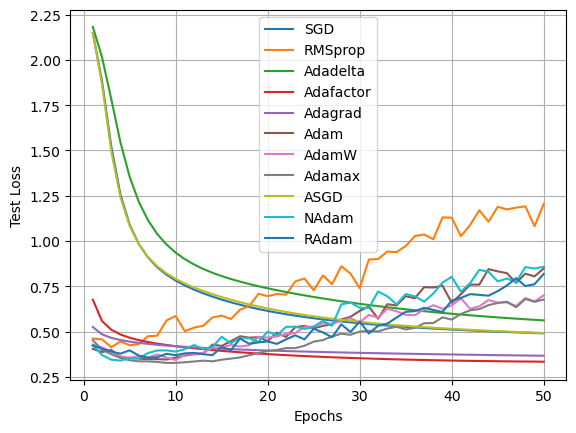

In [43]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), test_loss_sgd, label='SGD')
plt.plot(range(1, epochs + 1), test_loss_rms, label='RMSprop')
plt.plot(range(1, epochs + 1), test_loss_adadelta, label='Adadelta')
plt.plot(range(1, epochs + 1), test_loss_adafactor, label='Adafactor')
plt.plot(range(1, epochs + 1), test_loss_adagrad, label='Adagrad')
plt.plot(range(1, epochs + 1), test_loss_adam, label='Adam')
plt.plot(range(1, epochs + 1), test_loss_adamW, label='AdamW')
plt.plot(range(1, epochs + 1), test_loss_Adamax, label='Adamax')
plt.plot(range(1, epochs + 1), test_loss_ASGD, label='ASGD')
plt.plot(range(1, epochs + 1), test_loss_NAdam, label='NAdam')
plt.plot(range(1, epochs + 1), test_loss_RAdam, label='RAdam')
# plt.plot(range(1, epochs + 1), test_loss_RProp, label='Rprop') # что-то совсем плохо

plt.xlabel('Epochs')
plt.ylabel('Test Loss')

plt.title('')

plt.grid(True)

plt.legend()

plt.show()

## Сравнение и выводы

Алгоритмы Adafactor, Adagrad, ASGD, Adadeltaб Radam, показывают лучшие результаты в сравнении с остальными. Видно, что эти алгоритмы на данном наборе данных показывают хорошие результаты. У остальных ошибка только растет. Но я не понимаю, чем это объясняется. SGD использует градиентный подход, но ASGD оказался лучше из-за использования усредненных параметров обучения.